<a href="https://colab.research.google.com/github/yeon524/IDS/blob/main/TA_Team6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("kpop-lyrics-analytics/datasets/lyrics_by_year_1964_2023.csv")

df = df[(df['year'] >= 1970) & (df['year'] <= 2019)]
df = df.dropna(subset=['lyric'])

df.head()


,id,year,title,singer,lyric,x_rated
171,4058660,1970,소양강처녀,김태희,해 저문 소양강에 황혼이 지면\n외로운 갈대 밭이\n슬피 우는 두견새야\n열 여덣 ...,False
173,3773396,1970,가는 정 오는 정,남정희,아롱진 옷자락에\n서글픈 사연 안고\n내 마음은 울면서도\n겉으로는 웃으며\n사랑도...,False
175,3622569,1970,이정표 없는 거리,김상진,이리 가면 고향이오\n저리 가면 타향인데\n이정표 없는 거리\n헤매 도는 삼거리 길...,False
176,3621632,1970,아마도 빗물이겠지,이상열,맺지 못할 사랑이기에\n말없이 헤어졌고\n돌아서는 두발 길에\n이슬비는 내리네\n사...,False
177,3621631,1970,난이야,이상열,난이야 난이야\n사랑을 모두 주고\n울며 떠나간 너 바보구나\n때늦은 후회지만\n너...,False


In [ ]:
df = df[(df['year'] >= 1970) & (df['year'] <= 2019)].copy()

df = df.dropna(subset=['lyric'])

In [ ]:
import pandas as pd
import re
def calc_lang_ratio(text):
    hangul = re.findall(r"[가-힣]", text)
    english = re.findall(r"[A-Za-z]", text)

    h_count = len(hangul)
    e_count = len(english)
    total = len(text)

    return pd.Series({
        "hangul_ratio": h_count / total if total > 0 else 0,
        "english_ratio": e_count / total if total > 0 else 0,
        "hangul_count": h_count,
        "english_count": e_count,
        "total_chars": total
    })

lang_df = df['lyric'].apply(calc_lang_ratio)
df = pd.concat([df, lang_df], axis=1)

df.head()


,id,year,title,singer,lyric,x_rated,hangul_ratio,english_ratio,hangul_count,english_count,total_chars
171,4058660,1970,소양강처녀,김태희,해 저문 소양강에 황혼이 지면\n외로운 갈대 밭이\n슬피 우는 두견새야\n열 여덣 ...,False,0.712042,0.0,136.0,0.0,191.0
173,3773396,1970,가는 정 오는 정,남정희,아롱진 옷자락에\n서글픈 사연 안고\n내 마음은 울면서도\n겉으로는 웃으며\n사랑도...,False,0.711656,0.0,116.0,0.0,163.0
175,3622569,1970,이정표 없는 거리,김상진,이리 가면 고향이오\n저리 가면 타향인데\n이정표 없는 거리\n헤매 도는 삼거리 길...,False,0.686047,0.0,118.0,0.0,172.0
176,3621632,1970,아마도 빗물이겠지,이상열,맺지 못할 사랑이기에\n말없이 헤어졌고\n돌아서는 두발 길에\n이슬비는 내리네\n사...,False,0.732620,0.0,137.0,0.0,187.0
177,3621631,1970,난이야,이상열,난이야 난이야\n사랑을 모두 주고\n울며 떠나간 너 바보구나\n때늦은 후회지만\n너...,False,0.733668,0.0,146.0,0.0,199.0


In [ ]:
year_ratio = df.groupby('year')[['hangul_ratio', 'english_ratio']].mean()
year_ratio.head()


,hangul_ratio,english_ratio
year,,
1970,0.720243,0.000000
1971,0.714106,0.012025
1972,0.725891,0.000000
1973,0.729869,0.000000
1974,0.724830,0.000000


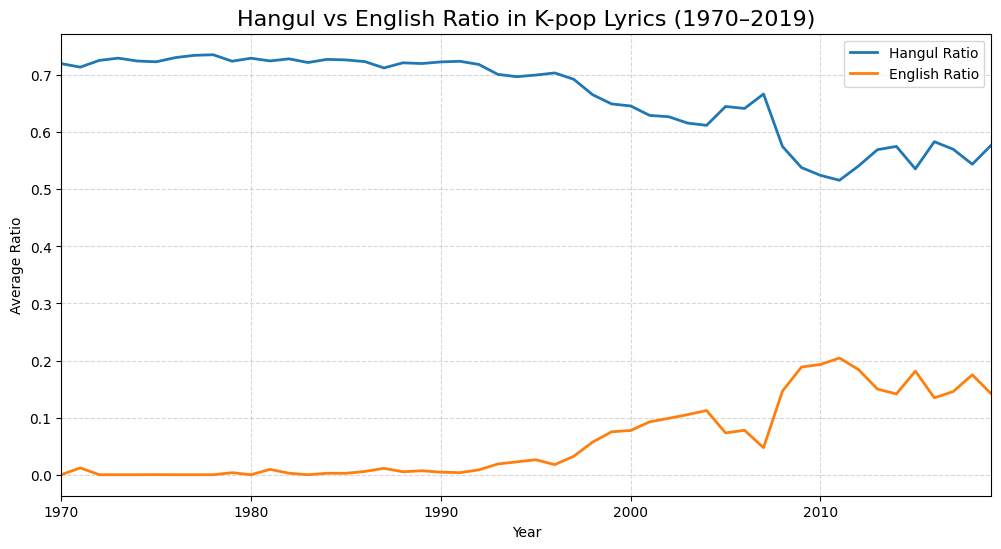

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

years = year_ratio['year']

plt.plot(years, year_ratio['hangul_ratio'], label='Hangul Ratio', linewidth=2)
plt.plot(years, year_ratio['english_ratio'], label='English Ratio', linewidth=2)

plt.title("Hangul vs English Ratio in K-pop Lyrics (1970–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Ratio")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.xlim(1970, 2019)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

year_ratio = df.groupby('year')[['hangul_ratio', 'english_ratio']].mean().reset_index()

denom = year_ratio['hangul_ratio'] + year_ratio['english_ratio']
korean_pct  = np.where(denom > 0, year_ratio['hangul_ratio'] / denom * 100, 0)
english_pct = np.where(denom > 0, year_ratio['english_ratio'] / denom * 100, 0)

years = year_ratio['year']


/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout

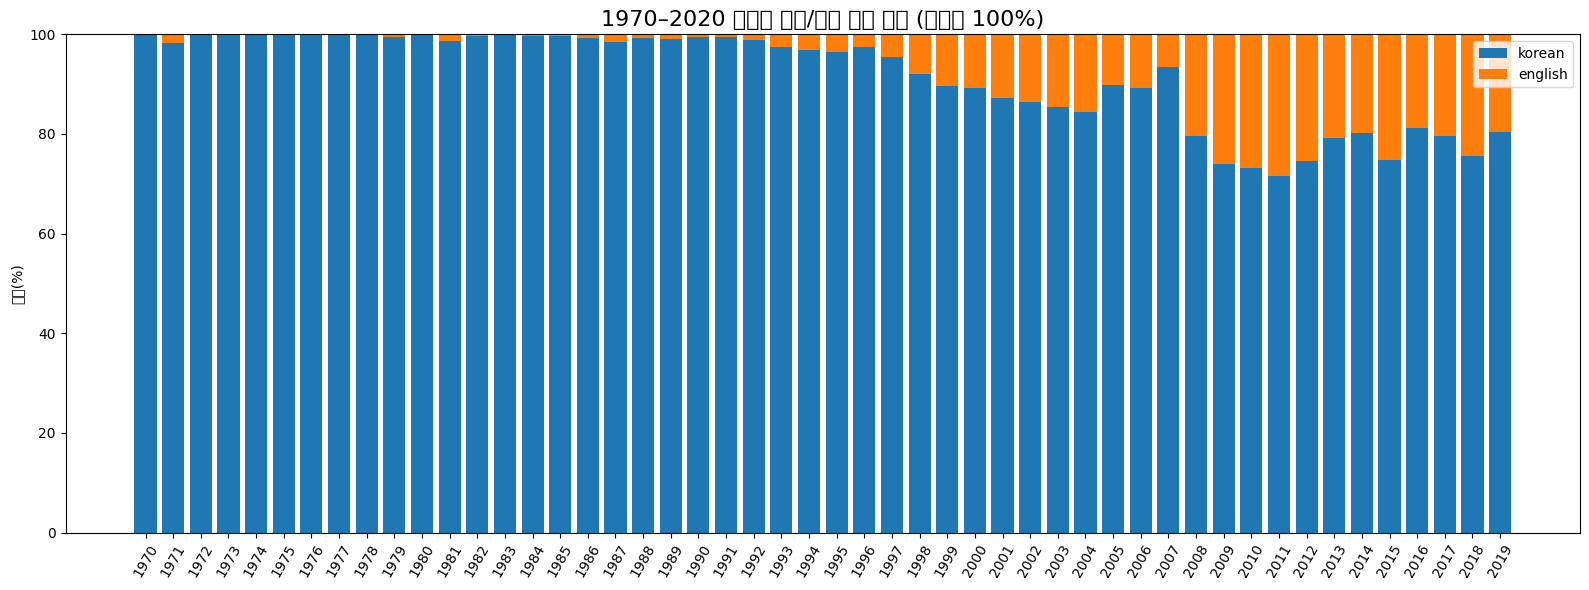

In [ ]:
plt.figure(figsize=(16, 6))

plt.bar(years, korean_pct, label='Korean')
plt.bar(years, english_pct, bottom=korean_pct, label='English')

plt.title("Yearly Ratio of Korean and English Lyrics (1970–2020, Normalized to 100%)", fontsize=16)
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

plt.xticks(years, rotation=60)
plt.legend()

plt.tight_layout()
plt.show()

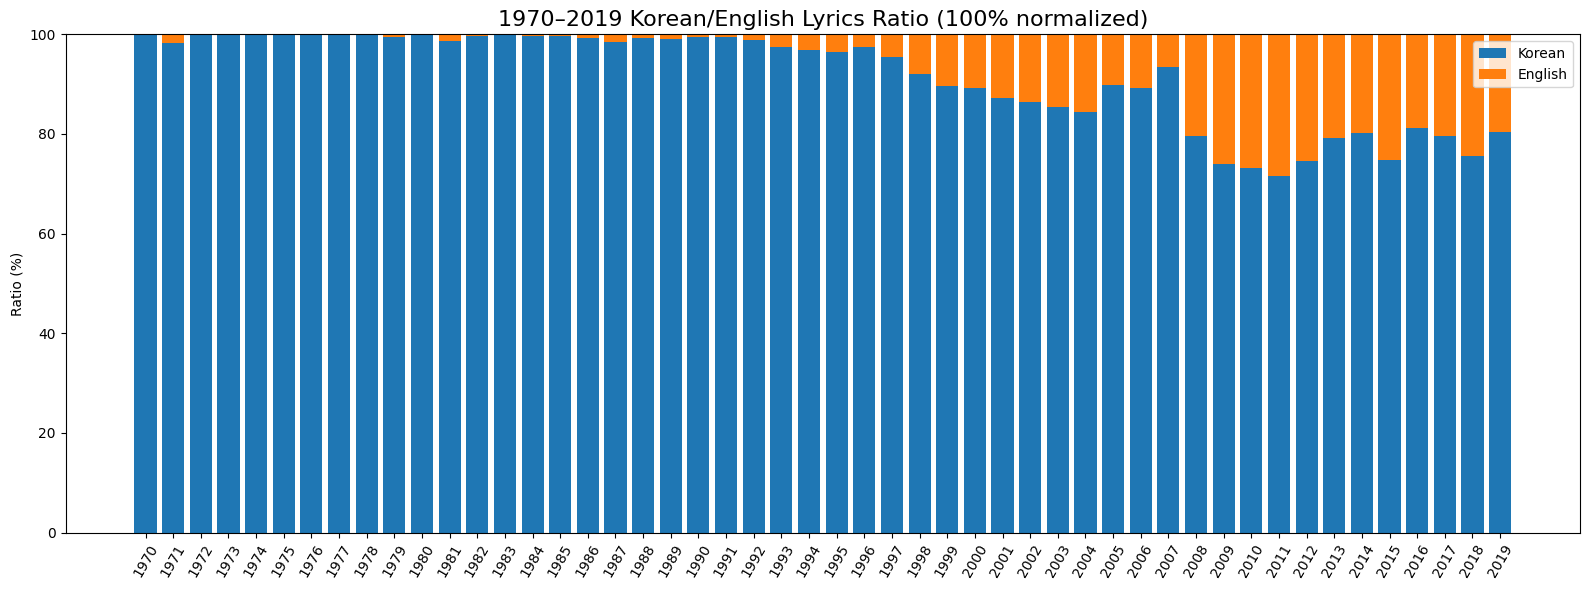

In [ ]:
plt.figure(figsize=(16, 6))

# Korean ratio (blue)
plt.bar(years, korean_pct, label='Korean')

# English ratio (green) stacked above Korean
plt.bar(years, english_pct, bottom=korean_pct, label='English')

plt.title("1970–2019 Korean/English Lyrics Ratio (100% normalized)", fontsize=16)
plt.ylabel("Ratio (%)")
plt.ylim(0, 100)

plt.xticks(years, rotation=60)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install kiwipiepy wordcloud

In [ ]:
from kiwipiepy import Kiwi
from collections import Counter

kiwi = Kiwi()

# 명사/동사/형용사/부사만 남기기
ALLOWED_TAGS = {'NNG', 'NNP', 'VV', 'VA', 'MAG'}

def tokenize_lyric(text):
    tokens = []
    for tok in kiwi.tokenize(text):
        form = tok.form
        tag  = tok.tag

        if tag not in ALLOWED_TAGS:
            continue

        # 동사, 형용사는 '다' 떼고 기본형 느낌으로
        if tag in {'VV', 'VA'} and form.endswith('다'):
            form = form[:-1]

        tokens.append((form, tag))
    return tokens

In [ ]:
# 각 곡마다 형태소 리스트 저장
df['tokens'] = df['lyric'].apply(tokenize_lyric)

# (확인)
df[['year', 'title', 'tokens']].head()

,year,title,tokens
171,1970,소양강처녀,"[(해, NNG), (저물, VV), (소양강, NNP), (황혼, NNG), (지..."
173,1970,가는 정 오는 정,"[(아롱, NNG), (지, VV), (옷자락, NNG), (서글프, VA), (사..."
175,1970,이정표 없는 거리,"[(이리, MAG), (가, VV), (고향, NNG), (저리, MAG), (가,..."
176,1970,아마도 빗물이겠지,"[(맺, VV), (사랑, NNG), (말없이, MAG), (헤어지, VV), (돌..."
177,1970,난이야,"[(사랑, NNG), (모두, MAG), (주, VV), (울, VV), (떠나가,..."


In [ ]:
import zipfile, os

zip_path = "kpop-lyrics-analytics/notosanskr.zip"
extract_dir = "fonts"

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_dir)

# 폰트 파일 이름은 압축 풀린 폴더 안에서 한 번 확인해서 바꿔줘
font_path = [f for f in os.listdir(extract_dir) if f.lower().endswith('.otf') or f.lower().endswith('.ttf')][0]
font_path = os.path.join(extract_dir, font_path)
font_path

'fonts/NotoSansCJKkr-Bold.otf'

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def make_wordcloud(tokens, title, max_words=200):
    freq = Counter(tokens)
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=600,
        max_words=max_words
    ).generate_from_frequencies(freq)

    plt.figure(figsize=(6,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


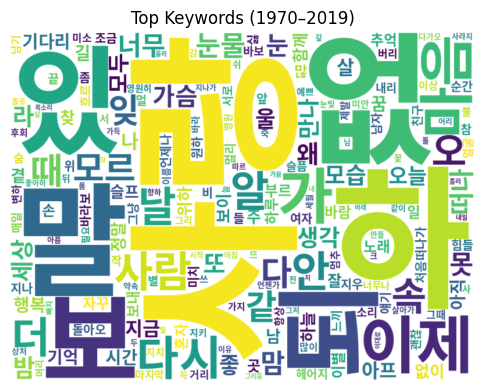

In [ ]:
# Extract only the forms from tokens
all_korean_tokens = [form for row in df['tokens'] for form, tag in row]

make_wordcloud(all_korean_tokens, "Top Keywords (1970–2019)")


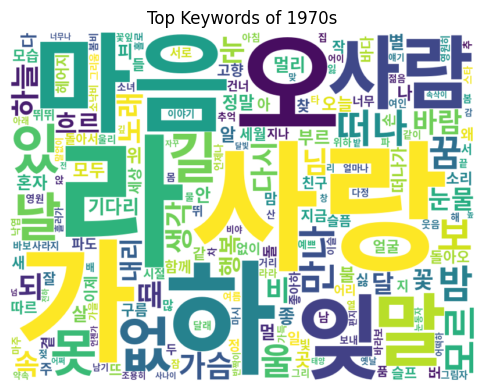

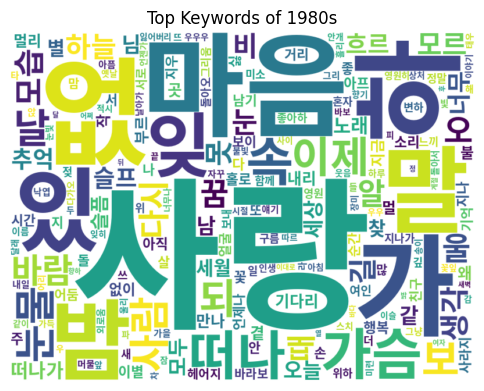

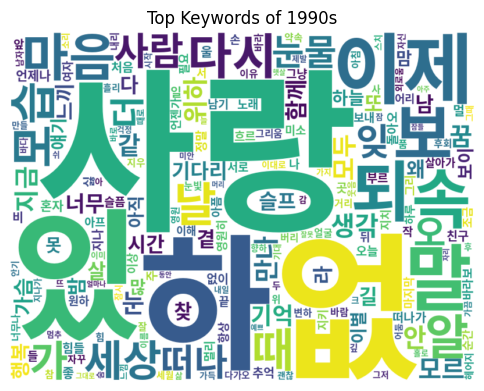

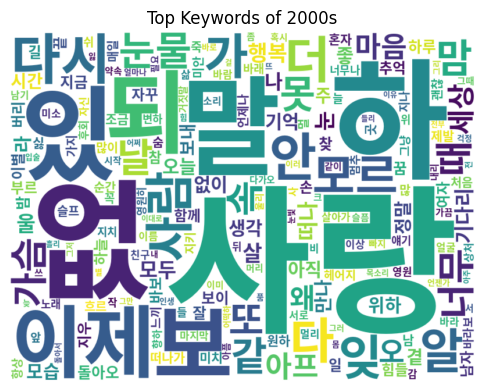

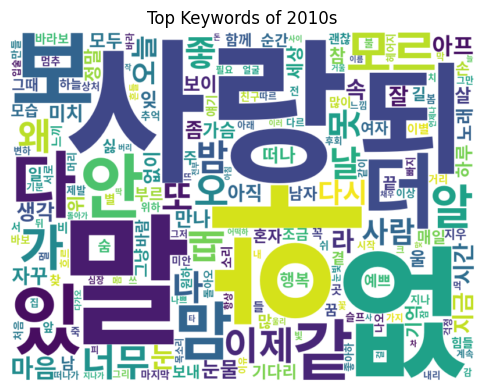

In [ ]:
# Add decade column
df['decade'] = (df['year'] // 10) * 10    # 1970, 1980, ...

for decade, group in df.groupby('decade'):
    tokens_decade = [form for row in group['tokens'] for form, tag in row]

    title = f"Top Keywords of {decade}s"

    make_wordcloud(tokens_decade, title)


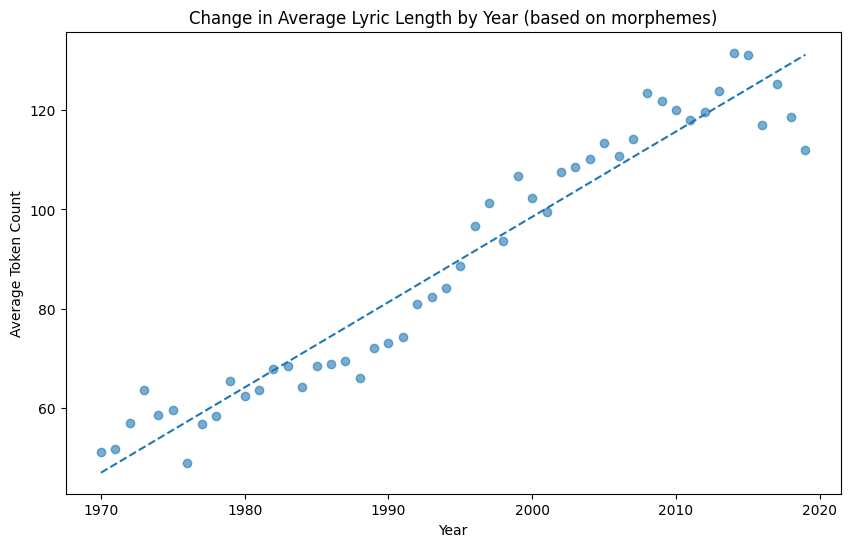

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Token length per song
df['token_len'] = df['tokens'].apply(len)

year_len = df.groupby('year')['token_len'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(year_len['year'], year_len['token_len'], alpha=0.6)

# Simple regression line
z = np.polyfit(year_len['year'], year_len['token_len'], 1)
p = np.poly1d(z)
plt.plot(year_len['year'], p(year_len['year']), linestyle='--')

plt.xlabel('Year')
plt.ylabel('Average Token Count')
plt.title('Change in Average Lyric Length by Year (based on morphemes)')
plt.show()

In [ ]:
from collections import defaultdict

# 품사별 전체 카운트
pos_counts = defaultdict(Counter)

for row in df['tokens']:
    for form, tag in row:
        pos_counts[tag][form] += 1

# 태그를 크게 4종류로 묶자 (명사/동사/형용사/부사)
POS_MAP = {
    'NNG': 'NOUN',
    'NNP': 'NOUN',
    'VV': 'VERB',
    'VA': 'ADJ',
    'MAG': 'ADV'
}

grouped_counts = defaultdict(Counter)
for tag, cnt in pos_counts.items():
    if tag not in POS_MAP:
        continue
    big = POS_MAP[tag]
    for word, c in cnt.items():
        grouped_counts[big][word] += c


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumBarunGothic'   # 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

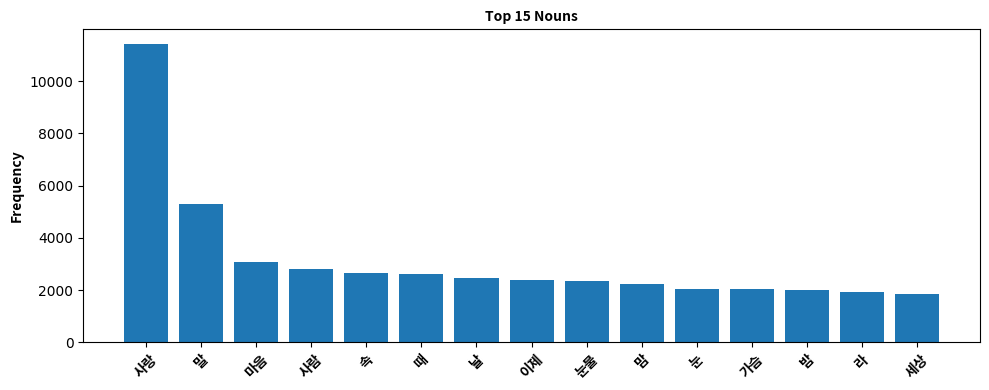

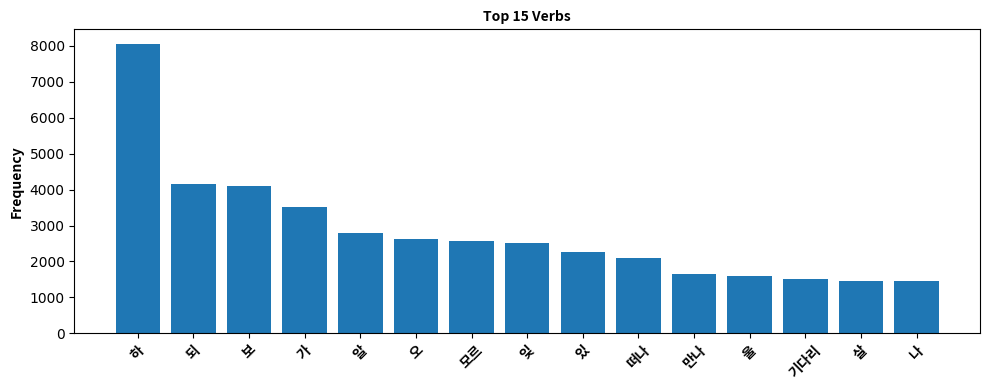

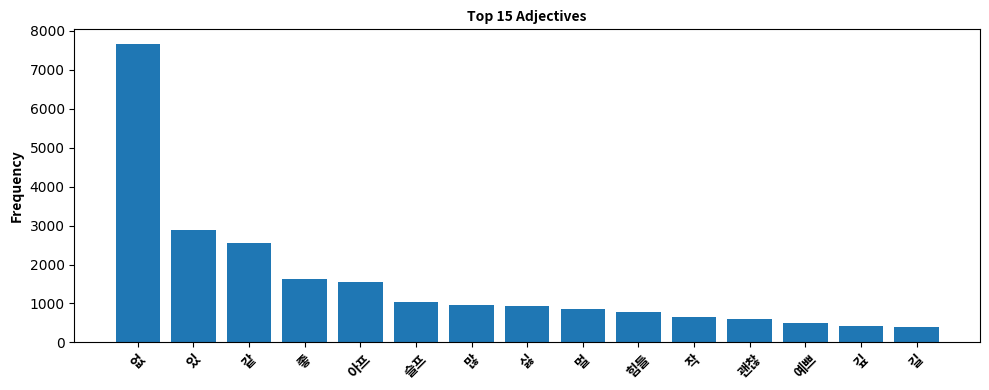

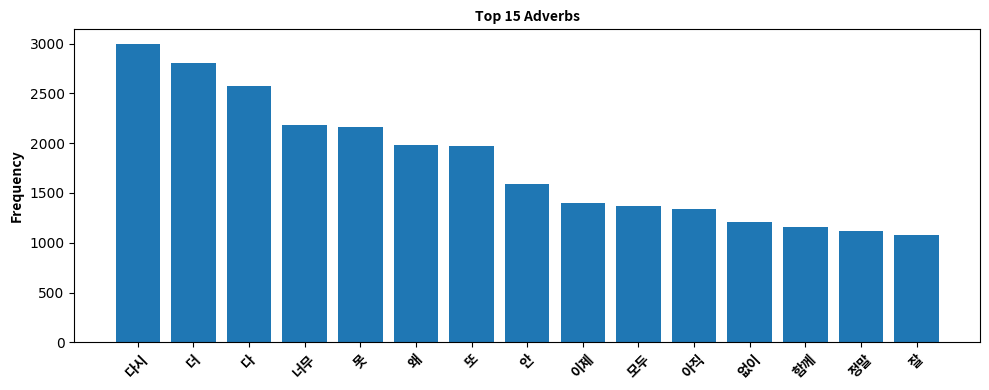

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 워드클라우드에서 쓰던 한글 폰트 경로 (이미 font_path 변수에 들어있다는 전제)
kfont = fm.FontProperties(fname=font_path)

def plot_top_words(counter, title, top_n=15):
    top = counter.most_common(top_n)
    words = [w for w, c in top]
    counts = [c for w, c in top]

    plt.figure(figsize=(10, 4))
    plt.bar(words, counts)

    # x축 라벨에 한글 폰트 적용
    plt.xticks(rotation=45, fontproperties=kfont)
    # y축 라벨, 제목에도 한글 폰트 적용 (제목은 영어지만 폰트는 한글 지원폰트라 괜찮음)
    plt.ylabel('Frequency', fontproperties=kfont)
    plt.title(title, fontproperties=kfont)

    plt.tight_layout()
    plt.show()

# 실행
plot_top_words(grouped_counts['NOUN'], "Top 15 Nouns")
plot_top_words(grouped_counts['VERB'], "Top 15 Verbs")
plot_top_words(grouped_counts['ADJ'],  "Top 15 Adjectives")
plot_top_words(grouped_counts['ADV'],  "Top 15 Adverbs")


In [ ]:
stopwords = set([
    "있", "없", "때", "말", "좀", "더", "왜", "또", "난", "난다", "그냥",
    "아직", "이제", "정말", "마저", "다시", "너무", "보다", "처럼", "에게",
    "에서", "으로", "까지", "만큼", "뿐", "듯", "건", "거", "것",
    "내", "네", "나", "너", "우리", "모든",
    "은", "는", "이", "가", "을", "를", "도", "와", "과", "에", "의",
])


In [ ]:
def clean_tokens(token_list):
    return [
        form for form, tag in token_list
        if form not in stopwords
        and len(form) > 1  # 한 글자 단어 제거
        and tag not in ["JKS", "JKC", "JKB", "JKG", "JKO", "JX", "JC", "EP", "EF", "EC", "ETN", "ETM"]
        # 조사, 어미 제거
    ]


In [ ]:
df['clean_tokens'] = df['tokens'].apply(clean_tokens)


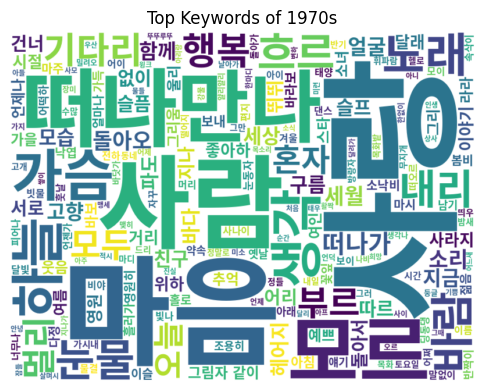

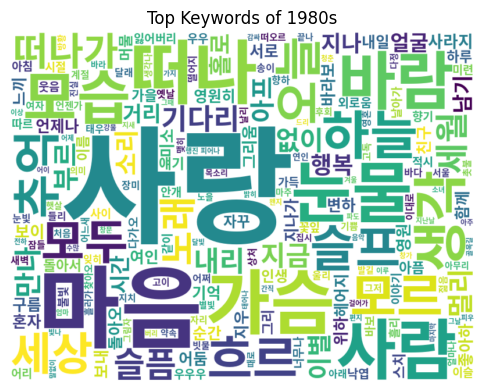

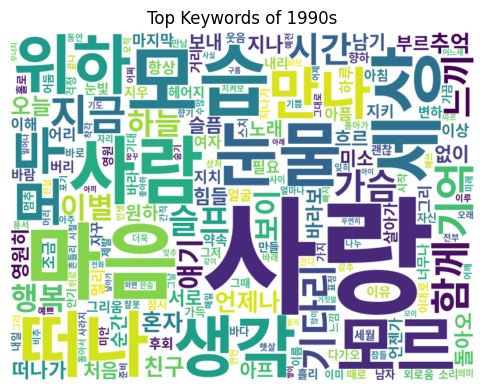

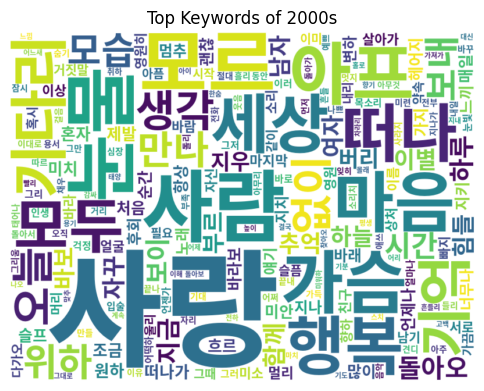

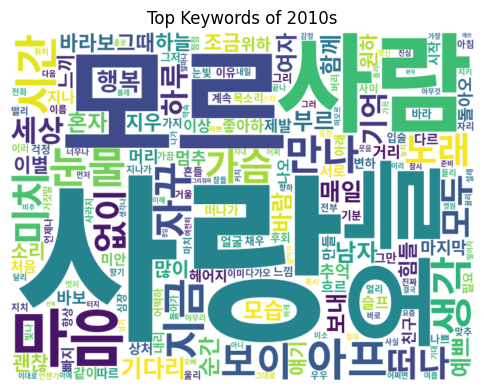

In [ ]:
# 1) decade 컬럼 만들기 (이미 있으면 다시 안 만들어도 됨)
df['decade'] = (df['year'] // 10) * 10   # 1970, 1980, ...

# 2) 전처리된 clean_tokens로 10년대별 워드클라우드 만들기
for decade, group in df.groupby('decade'):
    # 이 10년대에 속한 곡들의 clean_tokens 다 펼치기
    tokens_decade = [form for row in group['clean_tokens'] for form in row]

    # 워드클라우드 그리기
    make_wordcloud(tokens_decade, f"Top Keywords of {decade}s")


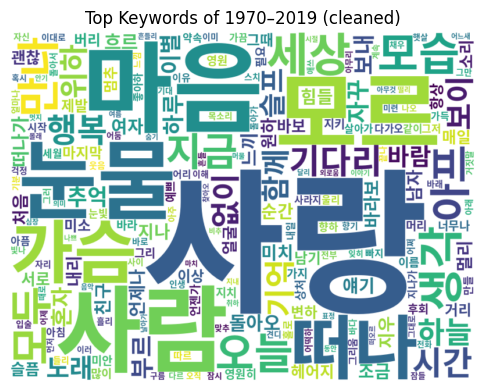

In [ ]:
# (형태소만 뽑기: form만)  → 전처리 적용 버전
all_korean_tokens = [form for row in df['clean_tokens'] for form in row]
make_wordcloud(all_korean_tokens, "Top Keywords of 1970–2019 (cleaned)")


In [ ]:
# 가사 길이(글자 수)
df['lyric_len'] = df['lyric'].apply(lambda x: len(str(x)))

# 가장 긴 가사 TOP 20
longest_lyrics = df.sort_values('lyric_len', ascending=False).head(20)
print(longest_lyrics[['year', 'singer', 'title', 'lyric_len']])

# 가장 짧은 가사 TOP 20
shortest_lyrics = df.sort_values('lyric_len', ascending=True).head(20)
print(shortest_lyrics[['year', 'singer', 'title', 'lyric_len']])

      year           singer  \
3959  2016        BewhY 비와이   
3152  2008       BIGBANG 빅뱅   
4193  2019             기리보이   
3178  2009       SHINee 샤이니   
2771  2005              이효리   
4251  2019              pH1   
4072  2018              pH1   
3777  2015  Red Velvet 레드벨벳   
4094  2018            방탄소년단   
3976  2017               행주   
2261  1999          드렁큰 타이거   
2538  2002              윤미래   
3943  2016           싸이 PSY   
3977  2017               넉살   
3376  2011              윤미래   
3596  2013             2NE1   
3359  2010               현아   
2371  2001              YDG   
2646  2003          CB Mass   
4110  2018       Rohann 이로한   

                                                  title  lyric_len  
3959                                   The Time Goes On       2679  
3152                                        How Gee 하우지       2552  
4193        아퍼 Feat Kid Milli Lil tachi 김승민 NOEL C JAMM       2291  
3178                                     Ring Ding Dong       2205  
277

In [ ]:
# --- Install Hangul font (Colab) ---
!sudo apt-get install -qq fonts-noto-cjk

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK KR'
plt.rcParams['axes.unicode_minus'] = False


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 경로 직접 등록
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# matplotlib 전역 설정
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

print("사용 중인 폰트:", fontprop.get_name())


사용 중인 폰트: NanumGothic


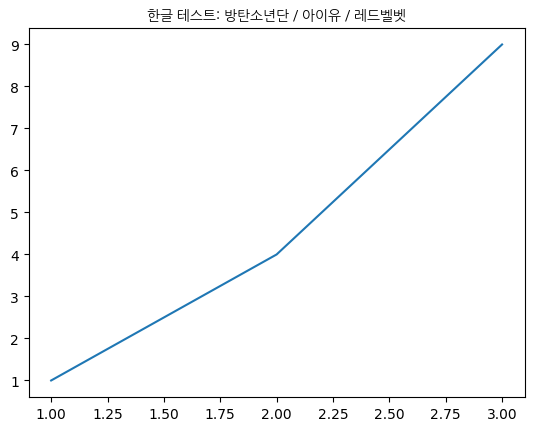

In [ ]:
plt.figure()
plt.plot([1,2,3],[1,4,9])
plt.title("한글 테스트: 방탄소년단 / 아이유 / 레드벨벳", fontproperties=fontprop)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumBarunGothic'   # 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

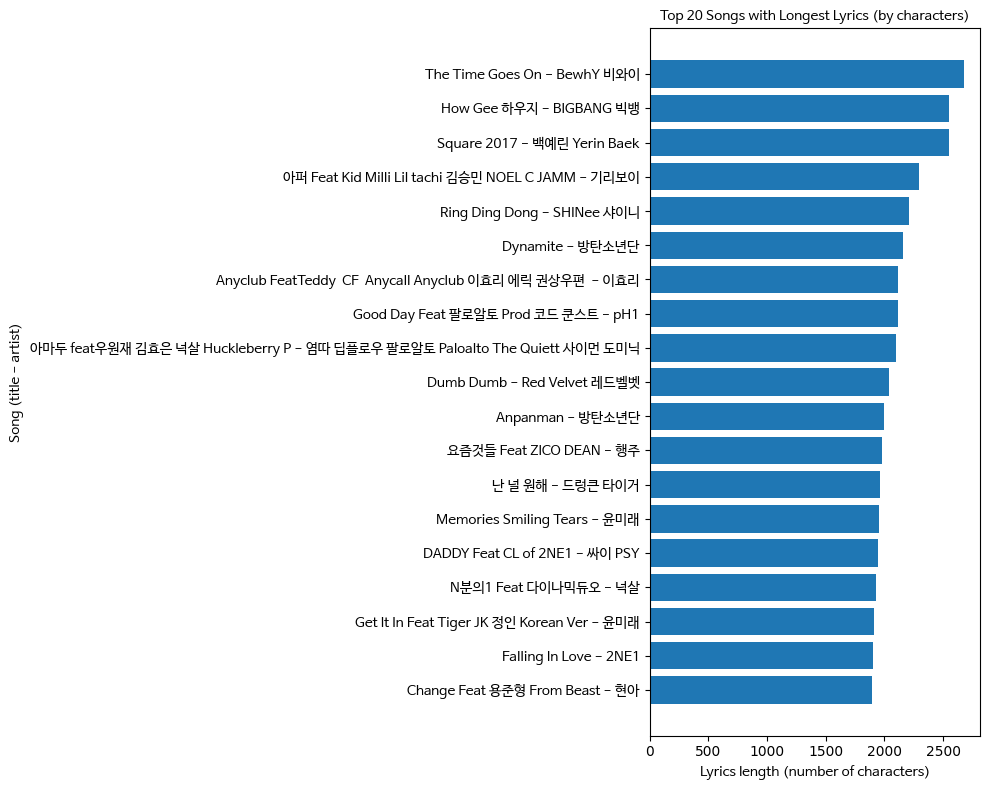

In [ ]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

top_long = (
    longest_lyrics
    .head(20)
    .sort_values('lyric_len', ascending=True)
)

plt.figure(figsize=(10, 8))
plt.barh(
    top_long['title'] + " - " + top_long['singer'],
    top_long['lyric_len']
)

plt.title("Top 20 Songs with Longest Lyrics (by characters)", fontproperties=font_prop)
plt.xlabel("Lyrics length (number of characters)", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()


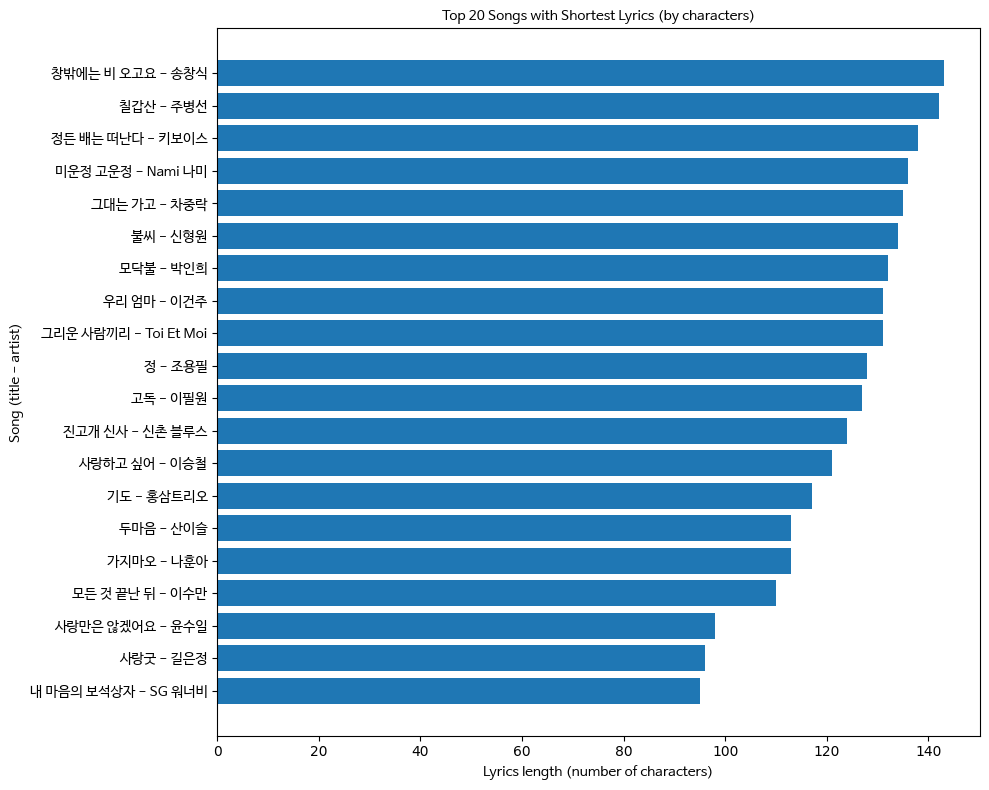

In [ ]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

# 폰트 파일 경로 (Colab에서도 존재)
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 짧은 가사 Top 20
top_short = (
    shortest_lyrics
    .head(20)
    .sort_values('lyric_len', ascending=True)
)

plt.figure(figsize=(10, 8))
plt.barh(
    top_short['title'] + " - " + top_short['singer'],
    top_short['lyric_len']
)

plt.title("Top 20 Songs with Shortest Lyrics (by characters)", fontproperties=font_prop)
plt.xlabel("Lyrics length (number of characters)", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

plt.yticks(fontproperties=font_prop)  # 🎯 y축에 폰트 적용 (제목/가수 한글!)

plt.tight_layout()
plt.show()


In [ ]:
df['token_len'] = df['tokens'].apply(len)

most_tokens = df.sort_values('token_len', ascending=False).head(20)
print(most_tokens[['year', 'singer', 'title', 'token_len']])


      year                                    singer  \
4329  2020  염따 딥플로우 팔로알토 Paloalto The Quiett 사이먼 도미닉   
3959  2016                                 BewhY 비와이   
3977  2017                                        넉살   
3976  2017                                        행주   
4193  2019                                      기리보이   
2357  2000                                        주석   
3600  2013                                     아웃사이더   
4106  2018                                  김하온 HAON   
2193  1999                                      젝스키스   
4229  2019              Jvcki Wai 양홍원 Osshun Gum 한요한   
2311  2000                                       업타운   
2523  2002                                 YG Family   
2207  1999                                       브로스   
2512  2002                                   CB Mass   
2629  2003                                   드렁큰 타이거   
3396  2011                                        리쌍   
2211  1999                                    허니

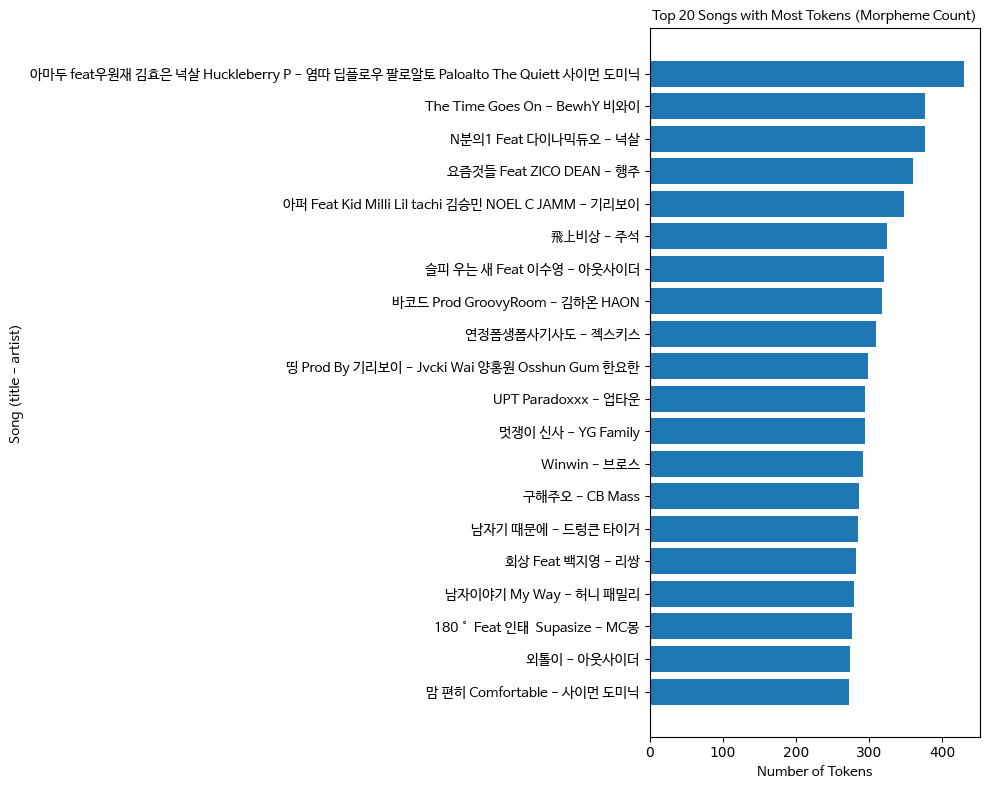

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# --- 한글 폰트 지정 (Colab에서도 100% 존재하는 경로) ---
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Top 20 songs by number of tokens ---
top_tokens = (
    most_tokens
    .head(20)
    .sort_values('token_len', ascending=True)   # barh는 아래→위로 증가
)

plt.figure(figsize=(10, 8))

plt.barh(
    top_tokens['title'] + " - " + top_tokens['singer'],
    top_tokens['token_len']
)

plt.title("Top 20 Songs with Most Tokens (Morpheme Count)", fontproperties=font_prop)
plt.xlabel("Number of Tokens", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

# y축 라벨(곡명-가수명)에 한글 폰트 적용
plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [ ]:
# 가수별 평균 가사 길이 (곡 5곡 이상)
artist_stats = (
    df.groupby('singer')
      .agg(avg_len=('lyric_len', 'mean'), songs=('title', 'count'))
      .query('songs >= 5')
      .sort_values('avg_len', ascending=False)
      .head(20)
)

artist_stats


,avg_len,songs
singer,,
드렁큰 타이거,1436.833333,6
4minute,1388.111111,9
업타운,1369.600000,5
MC몽,1308.555556,18
다이나믹 듀오,1247.200000,5
Red Velvet 레드벨벳,1245.545455,11
CNBLUE 씨엔블루,1197.857143,7
TWICE 트와이스,1196.875000,16
블락비 Block B,1193.666667,6


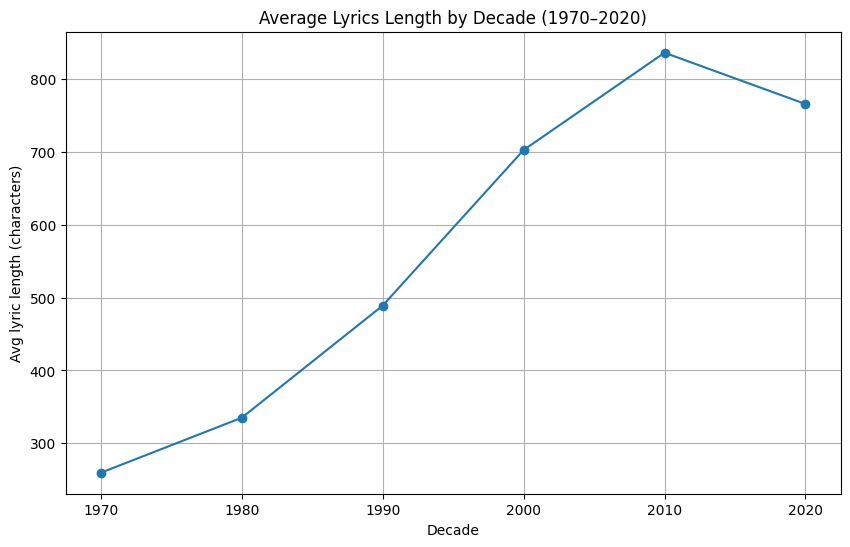

In [ ]:
decade_len = df.groupby('decade')['lyric_len'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(decade_len['decade'], decade_len['lyric_len'], marker='o')
plt.title("Average Lyrics Length by Decade (1970–2020)")
plt.xlabel("Decade")
plt.ylabel("Avg lyric length (characters)")
plt.grid(True)
plt.show()


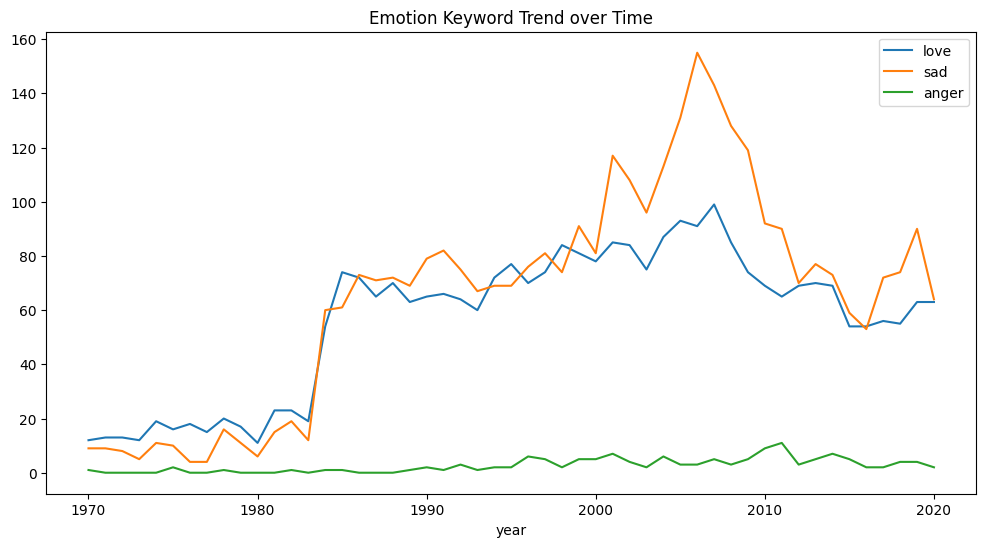

In [ ]:
emotion_dict = {
    "love": ["사랑", "좋아", "그리움", "보고싶어", "연인"],
    "sad": ["눈물", "아프", "슬프", "이별", "후회"],
    "anger": ["미워", "화", "짜증", "분노"],
}

# 감정 단어 포함 여부 count
def emotion_score(tokens):
    words = [form for form, tag in tokens]
    return {
        emo: sum(word in words for word in emotion_dict[emo])
        for emo in emotion_dict
    }

df_emotion = df['tokens'].apply(emotion_score).apply(pd.Series)
df_emotion['year'] = df['year']

emotion_by_year = df_emotion.groupby('year').sum()
emotion_by_year.plot(figsize=(12,6))
plt.title("Emotion Keyword Trend over Time")
plt.show()


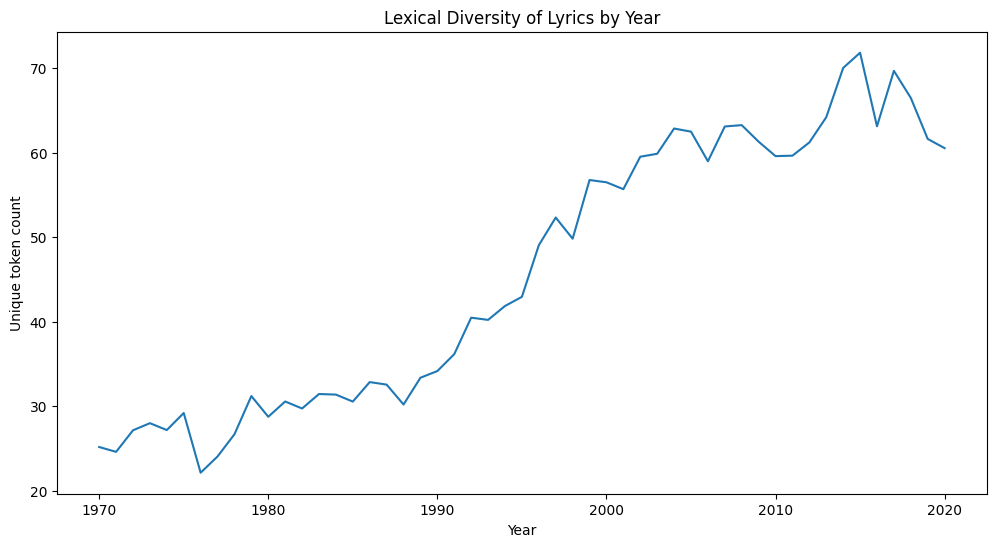

In [ ]:
df['unique_tokens'] = df['tokens'].apply(lambda x: len(set([t[0] for t in x])))

lex_div = df.groupby('year')['unique_tokens'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(lex_div['year'], lex_div['unique_tokens'])
plt.title("Lexical Diversity of Lyrics by Year")
plt.xlabel("Year")
plt.ylabel("Unique token count")
plt.show()
